In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv('movie_metadata.csv')
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
data.shape

(5043, 28)

In [5]:
data.info

<bound method DataFrame.info of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1

In [6]:
data.isna().any()

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [7]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
#Distributing columns to Numerical and Categorical
Num_col = [column for column in data.columns if data[column].dtype != 'object']
Cat_col = [column for column in data.columns if data[column].dtype == 'object']

In [9]:
Num_col

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [10]:
Cat_col

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [11]:
#Replacing Null categorical values with mode

data['color'].fillna(data['color'].mode()[0], inplace = True)
data['country'].fillna(data['country'].mode()[0], inplace = True)
data['language'].fillna(data['language'].mode()[0], inplace = True)

In [12]:
data['content_rating'].value_counts()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [13]:
#Filling unrated values

data['content_rating'].fillna('Not Rated', inplace = True)

In [14]:
#Replacing some Numerical variables with the median (not using the mean because of the outliers)

data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].median(), inplace = True)
data['duration'].fillna(data['duration'].median(), inplace = True)
data['director_facebook_likes'].fillna(data['director_facebook_likes'].median(), inplace = True)
data['actor_1_facebook_likes'].fillna(data['actor_1_facebook_likes'].median(), inplace = True)
data['actor_2_facebook_likes'].fillna(data['actor_2_facebook_likes'].median(), inplace = True)
data['actor_3_facebook_likes'].fillna(data['actor_3_facebook_likes'].median(), inplace = True)
data['gross'].fillna(data['gross'].median(), inplace = True)
data['facenumber_in_poster'].fillna(data['facenumber_in_poster'].median(), inplace = True)
data['num_user_for_reviews'].fillna(data['num_user_for_reviews'].median(), inplace = True)
data['budget'].fillna(data['budget'].median(), inplace = True)
data['title_year'].fillna(data['title_year'].mode()[0], inplace = True)
data['aspect_ratio'].fillna(data['aspect_ratio'].mode()[0], inplace = True)

In [15]:
# maintaining a clean database(df) with all columns as w'll be using data for prediction purpose
df = data.copy()

In [16]:
#droping less important attributes
data.drop('plot_keywords', axis=1, inplace = True)
data.drop('movie_imdb_link', axis=1, inplace = True)
data.drop('color', axis=1, inplace = True)

In [17]:
#checking number of unique values
data['director_name'].nunique(), data['actor_1_name'].nunique(), data['actor_2_name'].nunique(), data['actor_3_name'].nunique()

(2398, 2097, 3032, 3521)

In [18]:
#Dropping Null values for these columns becoz they are heavily unique to substitute mean or median
data = data.dropna(axis=0, subset = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name'])

In [19]:
data.drop_duplicates(inplace = True)
data.shape

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(4875, 25)

In [20]:
# we have lost some of our data but it is less than 5%
data.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207CD449348>,
      dtype=object)

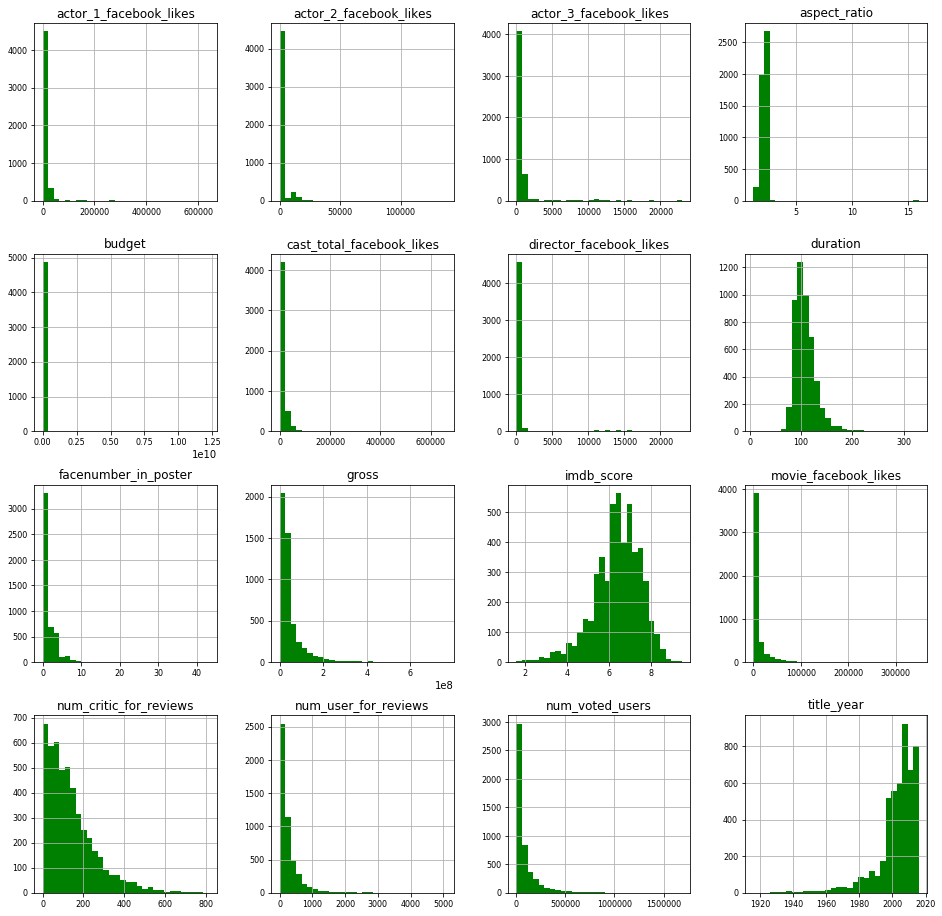

In [21]:
data.hist(bins=30, figsize=(16,16), color='Green', xlabelsize=8, ylabelsize=8)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

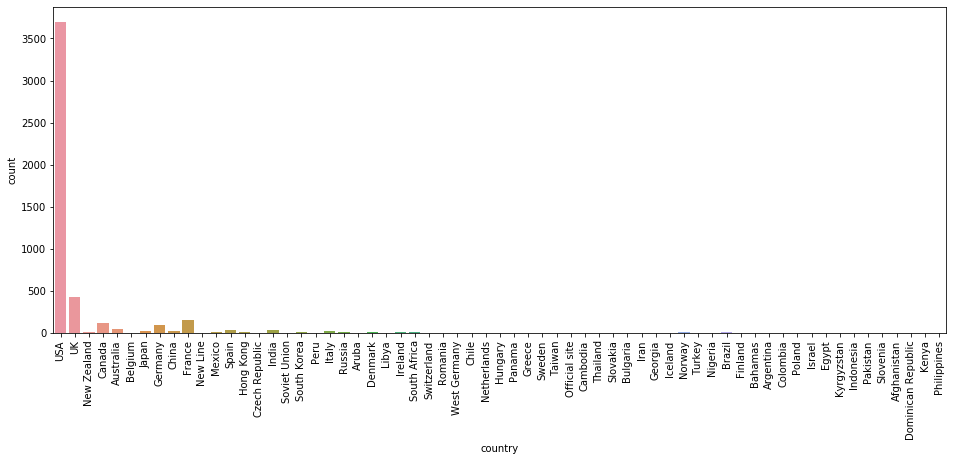

In [22]:
# Working on country column
plt.figure(figsize=(16,6))
plot = sns.countplot(x='country', data=data)
plt.xticks(rotation = 90)

In [23]:
data['country'].value_counts()

USA            3690
UK              428
France          151
Canada          120
Germany          96
               ... 
Philippines       1
Libya             1
New Line          1
Slovakia          1
Aruba             1
Name: country, Length: 63, dtype: int64

In [24]:
#Replacing other than USA & UK with others
countries = ['USA', 'UK']
data['country'] = data['country'].where(data['country'].isin(countries), 'other')
data['country'].value_counts()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


USA      3690
other     757
UK        428
Name: country, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

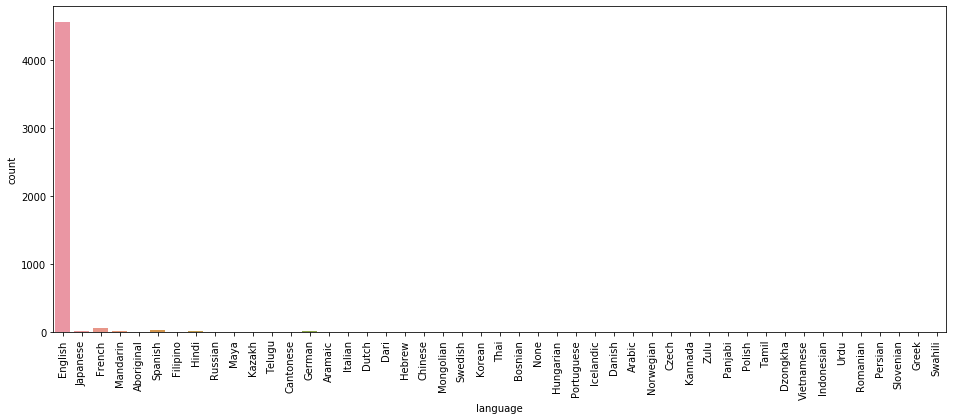

In [25]:
#Working on language column
plt.figure(figsize=(16,6))
plot = sns.countplot(x='language', data=data)
plt.xticks(rotation = 90)

In [26]:
data['language'].value_counts()

English       4560
French          72
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        16
Cantonese       11
Russian         11
Italian         10
Portuguese       8
Korean           8
Danish           5
Swedish          5
Norwegian        4
Dutch            4
Hebrew           4
Persian          4
Arabic           4
Thai             3
Chinese          3
Romanian         2
Dari             2
None             2
Aboriginal       2
Zulu             2
Indonesian       2
Kazakh           1
Slovenian        1
Tamil            1
Vietnamese       1
Polish           1
Hungarian        1
Panjabi          1
Bosnian          1
Telugu           1
Czech            1
Maya             1
Dzongkha         1
Aramaic          1
Greek            1
Filipino         1
Mongolian        1
Kannada          1
Urdu             1
Swahili          1
Icelandic        1
Name: language, dtype: int64

In [27]:
#Replacing all than except English to others
languages = ['English']
data['language'] = data['language'].where(data['language'].isin(languages), 'other')
data['language'].value_counts()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


English    4560
other       315
Name: language, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

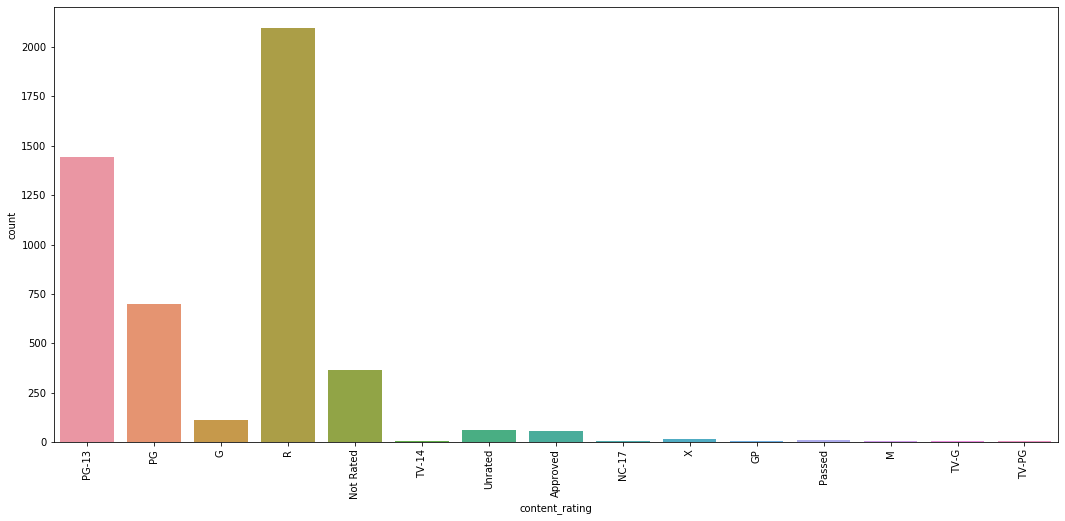

In [28]:
plt.figure(figsize=(18,8))
plot = sns.countplot(x='content_rating', data= data)
plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

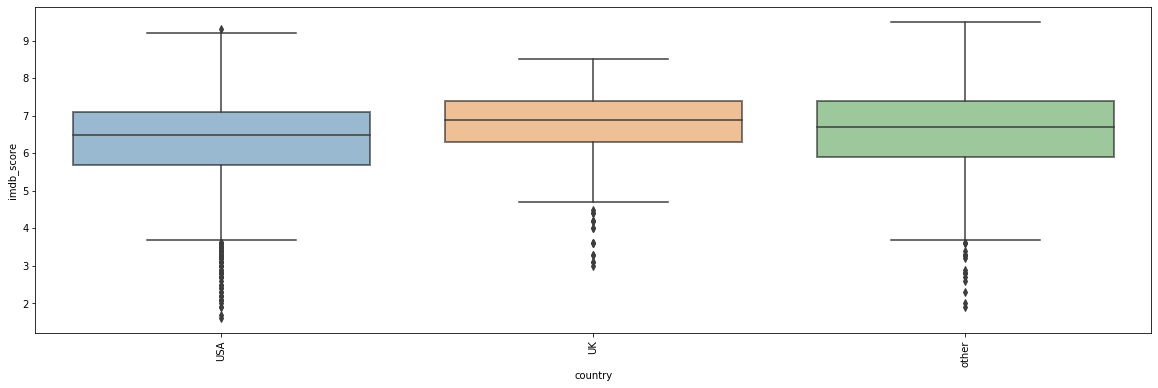

In [29]:
plt.figure(figsize = (20,6))
ax = sns.boxplot(x='country', y='imdb_score', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

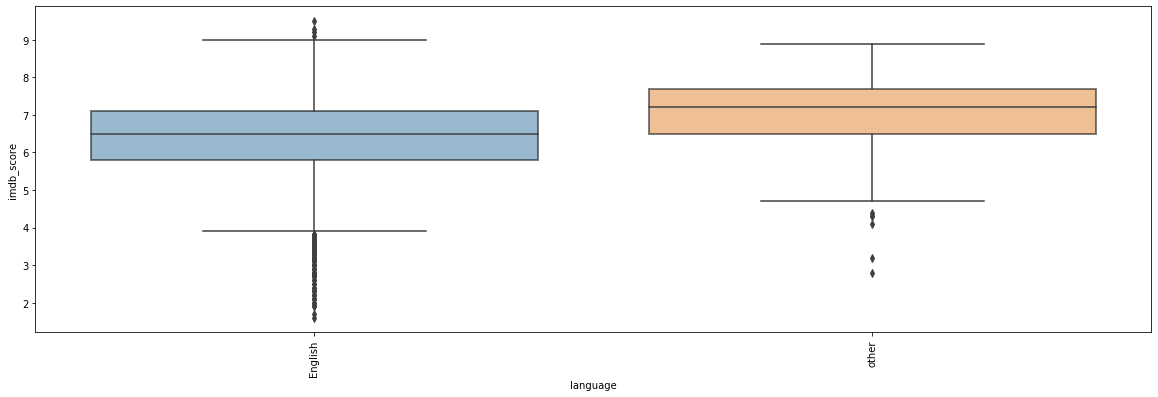

In [30]:
plt.figure(figsize = (20,6))
ax = sns.boxplot(x='language', y='imdb_score', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=90)

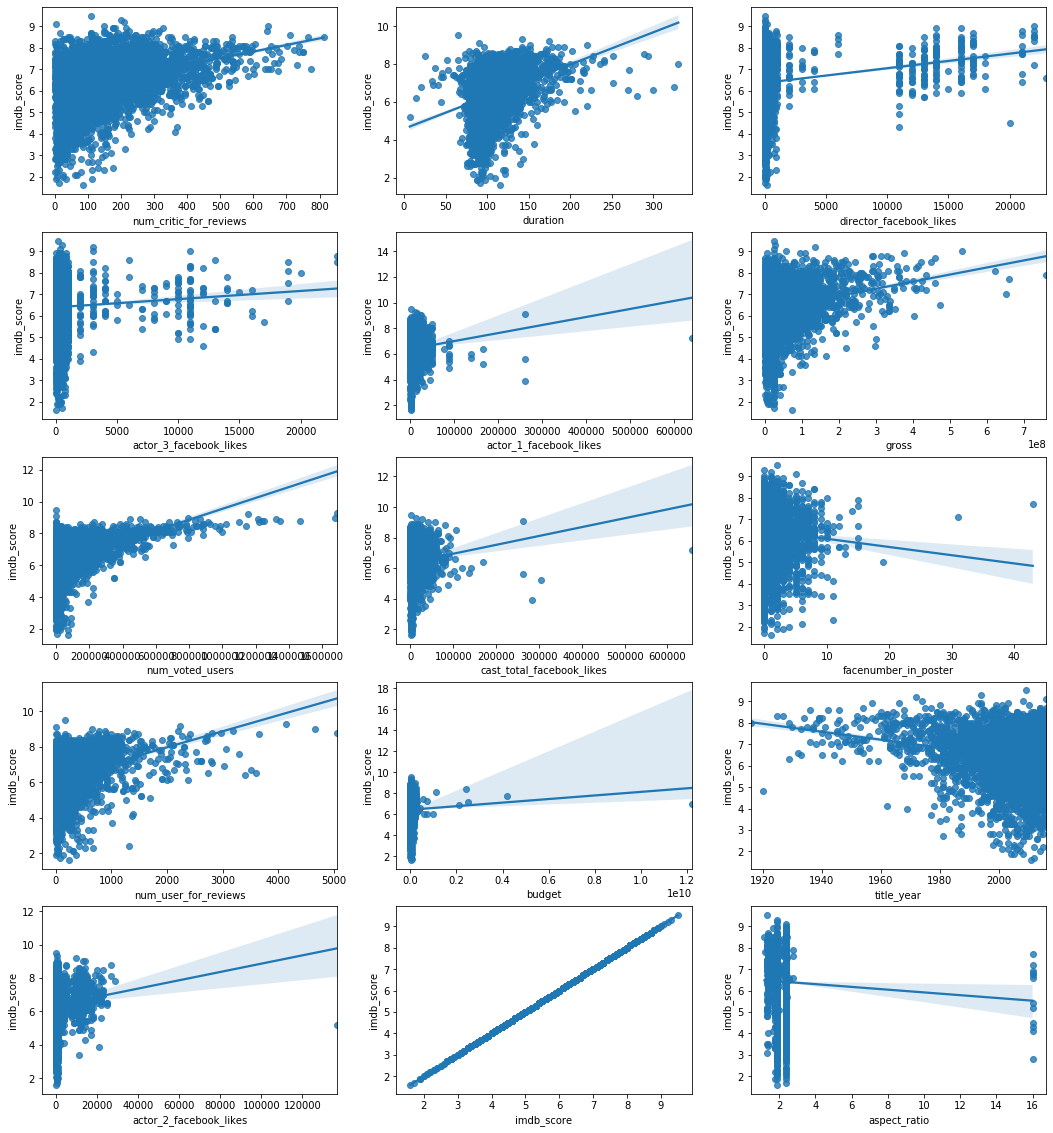

In [31]:
fig, ax = plt.subplots(round(len(Num_col) / 3), 3, figsize=(18,20))

for i, ax in enumerate(fig.axes):
    if i < len(Num_col) - 1:
        sns.regplot(x=Num_col[i], y='imdb_score', data=data[Num_col],ax=ax, label=Num_col)

In [32]:
#Replacing some special characters with comma
data['genres'] = data['genres'].str.split('|').str[0]
data['movie_title'] = data['movie_title'].str.replace('Â', ' ')

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
data['genres'].replace({"Western" : "Drama" , "Family" : "Drama", "Romance" : "Drama"}, inplace = True)
data['genres'].replace({"Adventure" : "Thriller"}, inplace = True)
data['genres'].replace({"Mystery" : "Crime"}, inplace = True)
data['genres'].replace({"History" : "Documentary"}, inplace = True)
data['genres'].replace({"Sci-Fi" : "Fantasy" , "Musical" : "Fantasy", "Music" : "Fantasy" , "Film-Noir" : "Fantasy"}, inplace = True)
data['genres'].value_counts()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Comedy         1290
Action         1124
Drama           960
Thriller        466
Crime           362
Biography       250
Horror          226
Documentary      71
Fantasy          70
Animation        56
Name: genres, dtype: int64

# Categorizing the target variable 

In [34]:
#categorizing target values
bins = [1,3,6,10]
labels = ['FLOP','AVG', 'HIT']
data['success'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
data['success'].value_counts()

HIT     3314
AVG     1516
FLOP      45
Name: success, dtype: int64

Barplot of imdb_binned column

Text(0.5, 1.0, 'Categorization of movies success')

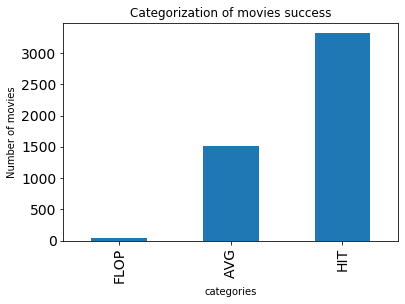

In [36]:
data.groupby(['success']).size().plot(kind='bar', fontsize=14)
plt.xlabel('categories')
plt.ylabel('Number of movies')
plt.title('Categorization of movies success')

'movie_title' is almost unique, and 'aspect_ratio' is less important hence it doesnt contribute much in prediction

In [37]:
data.drop(columns=['movie_title','aspect_ratio'], axis=1, inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Label Encoding
All the categorical columns with text data are being label encoded

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list = ['director_name', 'actor_1_name', 
            'actor_2_name', 'actor_3_name', 
            'genres', 'language', 'country',
            'content_rating']
data[cat_list] = data[cat_list].apply(lambda x:le.fit_transform(x))

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [39]:
data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,success
0,914,723.0,178.0,0.0,855.0,1367,1000.0,760505847.0,0,255,...,3054.0,0,1,7,237000000.0,2009.0,936.0,7.9,33000,HIT
1,788,302.0,169.0,563.0,1000.0,2159,40000.0,309404152.0,0,945,...,1238.0,0,1,7,300000000.0,2007.0,5000.0,7.1,0,HIT
2,2010,602.0,148.0,0.0,161.0,2425,11000.0,200074175.0,0,337,...,994.0,0,0,7,245000000.0,2015.0,393.0,6.8,85000,HIT
3,370,813.0,164.0,22000.0,23000.0,518,27000.0,448130642.0,0,1902,...,2701.0,0,1,7,250000000.0,2012.0,23000.0,8.5,164000,HIT
5,97,462.0,132.0,475.0,530.0,2483,640.0,73058679.0,0,424,...,738.0,0,1,7,263700000.0,2012.0,632.0,6.6,24000,HIT


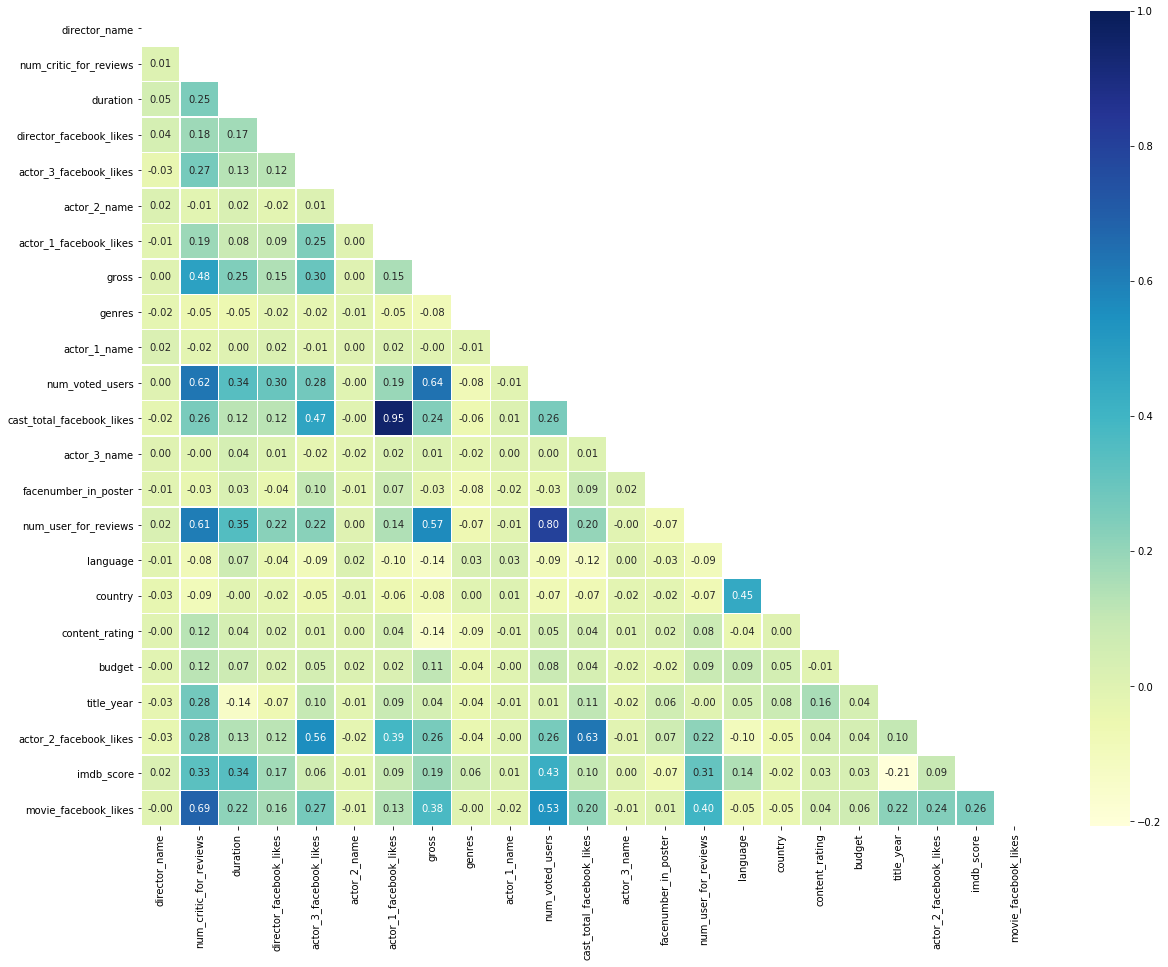

In [40]:
#Finding correlation after encoding
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, cmap='YlGnBu', linewidth=0.5 , fmt='0.2f',
            annot=True, mask = mask)

In [41]:
#Removing few columns due to multicollinearity
data.drop(columns=['num_critic_for_reviews'],axis=1, inplace=True)
#actor_1_fb_likes and cast_total_fb_likes are highly correlated
data.drop('cast_total_facebook_likes', axis=1, inplace=True)
#data.drop('num_user_for_reviews', axis=1, inplace =True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
#Removing 'imdb_score' since we have 'success'
data.drop(columns=['imdb_score'], inplace=True)

In [43]:
data.shape
data

,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,...,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,success
0,914,178.0,0.0,855.0,1367,1000.0,760505847.0,0,255,886204,...,0.0,3054.0,0,1,7,237000000.0,2009.0,936.0,33000,HIT
1,788,169.0,563.0,1000.0,2159,40000.0,309404152.0,0,945,471220,...,0.0,1238.0,0,1,7,300000000.0,2007.0,5000.0,0,HIT
2,2010,148.0,0.0,161.0,2425,11000.0,200074175.0,0,337,275868,...,1.0,994.0,0,0,7,245000000.0,2015.0,393.0,85000,HIT
3,370,164.0,22000.0,23000.0,518,27000.0,448130642.0,0,1902,1144337,...,0.0,2701.0,0,1,7,250000000.0,2012.0,23000.0,164000,HIT
5,97,132.0,475.0,530.0,2483,640.0,73058679.0,0,424,212204,...,1.0,738.0,0,1,7,263700000.0,2012.0,632.0,24000,HIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,618,95.0,0.0,133.0,416,296.0,4584.0,3,1056,1338,...,1.0,14.0,0,1,5,9000.0,2011.0,205.0,413,HIT
5038,2036,87.0,2.0,318.0,655,637.0,25517500.0,3,570,629,...,2.0,6.0,0,2,5,20000000.0,2013.0,470.0,84,HIT
5040,184,76.0,0.0,0.0,1923,0.0,25517500.0,6,588,38,...,0.0,3.0,0,1,5,1400.0,2013.0,0.0,16,HIT
5041,450,100.0,0.0,489.0,633,946.0,10443.0,3,31,1255,...,5.0,9.0,0,1,7,20000000.0,2012.0,719.0,660,HIT


# Model Building

In [44]:
#Independent variables
X = data.iloc[:, 0:20].values

#Dependent variable
y = data.iloc[:, 20].values
y

[HIT, HIT, HIT, HIT, HIT, ..., HIT, HIT, HIT, HIT, HIT]
Length: 4875
Categories (3, object): [FLOP < AVG < HIT]

### Train Test Split

In [45]:
#Splitting into Test and Train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
print(X_train.shape)
print(y_train.shape)

(3656, 20)
(3656,)


## Scaling
Few variables will be in the range of millions and some in tens, lets bring them all into scale

In [46]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection using RFECV
RFECV - Recursive Feature Elimination with Cross Validation

In [47]:
#Using Random Forest for RFE-CV and logloss as scoring
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

clf_rf = RandomForestClassifier(random_state=0)
rfecv = RFECV(estimator=clf_rf, step=1, cv=5, scoring='neg_log_loss')
rfecv = rfecv.fit(X_train, y_train)

In [48]:
#Optimal number of features
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best Features :', X_train.columns[rfecv.support_])

Optimal number of features : 13
Best Features : Int64Index([1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17, 18, 19], dtype='int64')


In [49]:
col_rfe = data.iloc[ :, X_train.columns[rfecv.support_]]
col_rfe

,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,num_voted_users,actor_3_name,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,178.0,0.0,855.0,1367,1000.0,760505847.0,886204,3370,3054.0,237000000.0,2009.0,936.0,33000
1,169.0,563.0,1000.0,2159,40000.0,309404152.0,471220,1358,1238.0,300000000.0,2007.0,5000.0,0
2,148.0,0.0,161.0,2425,11000.0,200074175.0,275868,3068,994.0,245000000.0,2015.0,393.0,85000
3,164.0,22000.0,23000.0,518,27000.0,448130642.0,1144337,1723,2701.0,250000000.0,2012.0,23000.0,164000
5,132.0,475.0,530.0,2483,640.0,73058679.0,212204,2652,738.0,263700000.0,2012.0,632.0,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,95.0,0.0,133.0,416,296.0,4584.0,1338,740,14.0,9000.0,2011.0,205.0,413
5038,87.0,2.0,318.0,655,637.0,25517500.0,629,692,6.0,20000000.0,2013.0,470.0,84
5040,76.0,0.0,0.0,1923,0.0,25517500.0,38,781,3.0,1400.0,2013.0,0.0,16
5041,100.0,0.0,489.0,633,946.0,10443.0,1255,982,9.0,20000000.0,2012.0,719.0,660


In [50]:
#Feature Ranking
clf_rf = clf_rf.fit(X_train, y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

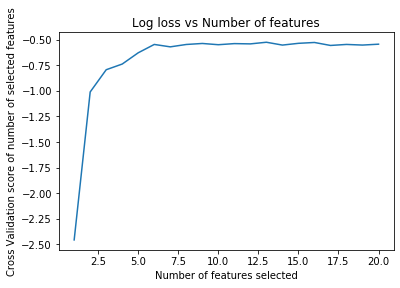

In [51]:
#Logless vs Number of Features
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross Validation score of number of selected features')
plt.title('Log loss vs Number of features')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Selecting the important features

In [52]:
#X_opt = X_train.iloc[:, X_train.columns[rfecv.support_]]
#X_test = X_test.iloc[:, X_test.columns[rfecv.support_]]

# Spliting Optimal dataset

In [53]:
#Selected features as required for user input
selected_features = ['num_voted_users' ,'num_user_for_reviews' ,'duration','gross' ,'genres' ,'title_year','budget']
X1 = data[selected_features]
y1 = data['success']

In [54]:
#Splitting the selected dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0, stratify=y)

In [55]:
print(X1_train.shape)
print(y1_train.shape)

(3656, 7)
(3656,)


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


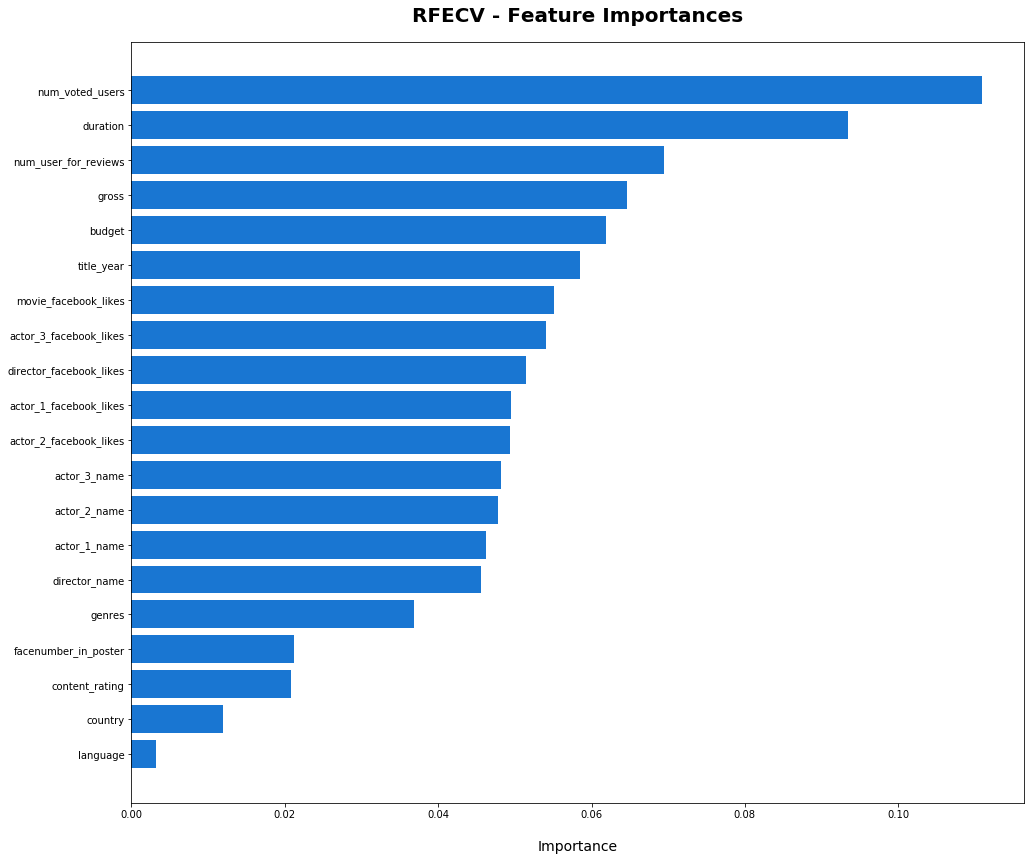

In [56]:
#Creating a new dataframe with column names and feature importance
dset = pd.DataFrame()
data1 = data
data1.drop(columns=['success'], inplace=True)
dset['attr'] = data1.columns
dset['importance'] = clf_rf.feature_importances_

#Sorting with importance column
dset = dset.sort_values(by = 'importance', ascending=True)

#Barplot indicating Feature Importance
plt.figure(figsize=(16,14))
plt.barh(y=dset['attr'], width = dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold',
         pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

# Random Forest

Constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of individual trees

In [57]:
#Training the Random Forest Classifier on Train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, 
            criterion = 'entropy', random_state = 0)
classifier.fit(X1_train, y1_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [58]:
#Predicting the target variable
y1_pred = classifier.predict(X1_test)
print(y1_pred)
print(accuracy_score(y_test,y1_pred))
pd.crosstab(y_test,y1_pred)

['HIT' 'HIT' 'AVG' ... 'HIT' 'HIT' 'HIT']
0.7973748974569319


col_0,AVG,HIT
row_0,,
FLOP,6,5
AVG,236,143
HIT,93,736


## Confusion Matrix
Confusion matrix gives a clear view of ground truth and prediction.

In [59]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred)
cm

array([[236,   0, 143],
       [  6,   0,   5],
       [ 93,   0, 736]], dtype=int64)

## Classification Report


In [60]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y1_test, y1_pred)
print(cr)

              precision    recall  f1-score   support

         AVG       0.70      0.62      0.66       379
        FLOP       0.00      0.00      0.00        11
         HIT       0.83      0.89      0.86       829

    accuracy                           0.80      1219
   macro avg       0.51      0.50      0.51      1219
weighted avg       0.79      0.80      0.79      1219



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
data['genres'].value_counts()

3    1290
0    1124
6     960
9     466
4     362
2     250
8     226
5      71
7      70
1      56
Name: genres, dtype: int64

In [62]:
data['num_voted_users'].describe()

count    4.875000e+03
mean     8.488807e+04
std      1.393619e+05
min      5.000000e+00
25%      9.005000e+03
50%      3.501800e+04
75%      9.817950e+04
max      1.689764e+06
Name: num_voted_users, dtype: float64

In [63]:
data['num_user_for_reviews'].describe()

count    4875.000000
mean      275.982974
std       380.324073
min         1.000000
25%        68.000000
50%       159.000000
75%       330.500000
max      5060.000000
Name: num_user_for_reviews, dtype: float64

In [64]:
pd.crosstab(y1_test, y1_pred)

col_0,AVG,HIT
success,,
FLOP,6,5
AVG,236,143
HIT,93,736


In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [66]:
X1_train_smote, y1_train_smote = smote.fit_sample(X1.astype('float'),y1)

In [67]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y1_train_smote))

Before SMOTE : Counter({'HIT': 2485, 'AVG': 1137, 'FLOP': 34})
After SMOTE : Counter({'HIT': 3314, 'AVG': 3314, 'FLOP': 3314})


In [68]:

classifier = RandomForestClassifier(n_estimators = 100, 
            criterion = 'entropy', random_state = 0)
classifier.fit(X1_train_smote,y1_train_smote)
y1_pred = classifier.predict(X1_test)
print("\n\nAccuracy : ", accuracy_score(y_test,y1_pred)*100)
print("\nCrossTab : \n\n", pd.crosstab(y_test, y1_pred))
print("\n\nConfusion Matrix : \n\n", confusion_matrix(y1_test,y1_pred))
print("\n\nReport : \n", classification_report(y1_test, y1_pred))
#pd.crosstab(y_test,y1_pred)



Accuracy :  100.0

CrossTab : 

 col_0  AVG  FLOP  HIT
row_0                
FLOP     0    11    0
AVG    379     0    0
HIT      0     0  829


Confusion Matrix : 

 [[379   0   0]
 [  0  11   0]
 [  0   0 829]]


Report : 
               precision    recall  f1-score   support

         AVG       1.00      1.00      1.00       379
        FLOP       1.00      1.00      1.00        11
         HIT       1.00      1.00      1.00       829

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [69]:
X1_test = [[886204,986204,178,760505847,0,2009,237000000]]
y1_pred = classifier.predict(X1_test)
print(y1_pred)

['HIT']
